In [1]:
ls

homework-1.ipynb


In [2]:
!python -V

Python 3.9.12


In [3]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet -O ../data/fhv_tripdata_2021-01.parquet
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet -O ../data/fhv_tripdata_2021-02.parquet    

--2022-05-20 23:09:13--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 54.231.33.147
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|54.231.33.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘../data/fhv_tripdata_2021-01.parquet’

../data/fhv_tripdat 100%[===================>]  11.33M  1.61MB/s    in 8.7s    

2022-05-20 23:09:23 (1.30 MB/s) - ‘../data/fhv_tripdata_2021-01.parquet’ saved [11886281/11886281]

--2022-05-20 23:09:23--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.217.39.60
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.217.39.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘../data/fhv_tripdata_202

In [4]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [5]:
!pip install pyarrow

In [6]:
df_jan = pd.read_parquet('../data/fhv_tripdata_2021-01.parquet')
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


# Question 1: Number of records in Jan 2021 FHV data
**1154112**

In [7]:
df_jan.shape

(1154112, 7)

# Question 2: Average duration in Jan 2021 FHV
**19.16**

In [8]:
df_jan['duration'] = df_jan.dropOff_datetime - df_jan.pickup_datetime

In [9]:
df_jan.duration.describe()

count                      1154112
mean     0 days 00:19:10.033445627
std      0 days 06:38:41.529882844
min                0 days 00:00:01
25%                0 days 00:07:46
50%                0 days 00:13:24
75%                0 days 00:22:17
max              294 days 00:11:03
Name: duration, dtype: object

In [10]:
df_jan.dtypes

dispatching_base_num               object
pickup_datetime            datetime64[ns]
dropOff_datetime           datetime64[ns]
PUlocationID                      float64
DOlocationID                      float64
SR_Flag                            object
Affiliated_base_number             object
duration                  timedelta64[ns]
dtype: object

In [11]:
df_jan.duration = df_jan.duration.apply(lambda t: t.total_seconds() / 60)

In [12]:
df_jan.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [13]:
len(df_jan)

1154112

/home/mikeyy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

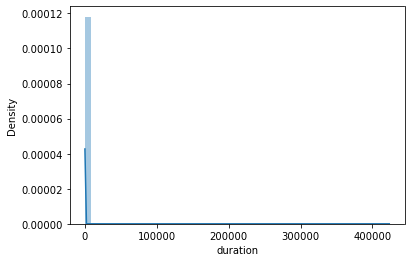

In [14]:
sns.distplot(df_jan.duration)

In [15]:
df_jan.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [16]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

In [17]:
len(df_jan)

1109826

## Number of records Dropped
44286

In [18]:
1154112 - 1109826

44286

In [19]:
df_jan.duration.describe()

count    1.109826e+06
mean     1.624725e+01
std      1.155150e+01
min      1.000000e+00
25%      7.850000e+00
50%      1.323333e+01
75%      2.146667e+01
max      6.000000e+01
Name: duration, dtype: float64

# Question 3: Fraction of missing values
**83%**

In [20]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


In [21]:
df_jan.columns.tolist()

['dispatching_base_num',
 'pickup_datetime',
 'dropOff_datetime',
 'PUlocationID',
 'DOlocationID',
 'SR_Flag',
 'Affiliated_base_number',
 'duration']

In [22]:
df_jan.PUlocationID.isnull().sum()

927008

In [23]:
len(df_jan.PUlocationID)

1109826

In [24]:
958267 / 1154112

0.8303067639882438

In [25]:
df_jan.PUlocationID = df_jan.PUlocationID.fillna(-1)

In [26]:
df_jan.PUlocationID.value_counts()

-1.0      927008
 221.0      8330
 206.0      6797
 129.0      5379
 115.0      4082
           ...  
 111.0         5
 27.0          4
 34.0          3
 2.0           2
 110.0         1
Name: PUlocationID, Length: 262, dtype: int64

In [27]:
# Convert to percentage
df_jan.PUlocationID.value_counts(normalize=True) * 100 

-1.0      83.527328
 221.0     0.750568
 206.0     0.612438
 129.0     0.484671
 115.0     0.367805
            ...    
 111.0     0.000451
 27.0      0.000360
 34.0      0.000270
 2.0       0.000180
 110.0     0.000090
Name: PUlocationID, Length: 262, dtype: float64

# Question 4: Dimensionality after OHE
--> apply one-hot encoding to the pickup and dropoff location IDs
* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer
* Get a feature matrix from it

**525**

In [28]:
def readdataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
        
        df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
        df.dropOff_datetime = pd.to_datetime(df.dropOff_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
        
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda t: t.total_seconds() / 60)
    
    df = df[(df.duration >=1) & (df.duration <= 60)]
    
#     df.PUlocationID = df.PUlocationID.fillna(-1)
#     df.DOlocationID = df.DOlocationID.fillna(-1)
    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [29]:
df_jan.columns.to_list()

['dispatching_base_num',
 'pickup_datetime',
 'dropOff_datetime',
 'PUlocationID',
 'DOlocationID',
 'SR_Flag',
 'Affiliated_base_number',
 'duration']

In [30]:
df_train = readdataframe('../data/fhv_tripdata_2021-01.parquet')
df_val = readdataframe('../data/fhv_tripdata_2021-02.parquet')

In [31]:
len(df_train), len(df_val)

(1109826, 990113)

In [32]:
df_train.duration.value_counts()

15.000000    5562
24.000000    5236
10.000000    5184
12.000000    5042
8.750000     4991
             ... 
59.666667      10
55.983333      10
58.150000      10
59.883333      10
59.500000      10
Name: duration, Length: 3541, dtype: int64

In [33]:
df_train.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                      object
DOlocationID                      object
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [34]:
df_train['PU_DO'] = df_train['PUlocationID'] + '_' + df_train['DOlocationID']
df_val['PU_DO'] = df_val['PUlocationID'] + '_' + df_val['DOlocationID']

In [35]:
# categorical = ['PU_DO'] #['PULocationID', 'DOLocationID']
categorical = ['PUlocationID', 'DOlocationID']
dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [36]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [37]:
X_val

<990113x525 sparse matrix of type '<class 'numpy.float64'>'
	with 1980223 stored elements in Compressed Sparse Row format>

In [38]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

# Question 5: RMSE on train
**10.5**

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107211169

/home/mikeyy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mikeyy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


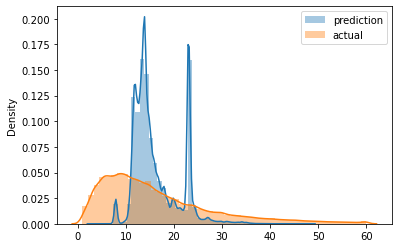

In [40]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

# Question 6: RMSE on validation
**11.01**

In [41]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.014283207699195

/home/mikeyy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mikeyy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


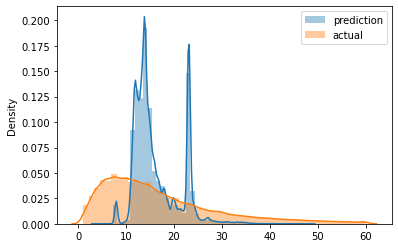

In [42]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()